In [3]:
import tensorflow as tf
from tensorflow import keras
import keras
import matplotlib.pyplot as plt
import math

from tensorflow.python.keras.saving.saved_model.load import metrics

In [4]:
def plot_samples(data,
                 n=5,
                 max_cols=5,
                 cmap="tab20"
                 ):
    n = min(len(data), n)
    if n < max_cols:
        rows = 1
        cols = n
    else:
        rows = math.ceil(n / max_cols)
        cols = max_cols
    print(f"rows: {rows}, cols: {cols}")
    fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True, figsize=(20, 10))
    #ax = ax.flatten()
    index = 0
    for i in range(rows):
        for j in range(cols):
            img = data[index]
            index += 1
            #    .numpy().reshape(X.shape[1],X.shape[2],2)
            print()
            ax[i, j].imshow(img, cmap=cmap, interpolation='nearest')
            if index >= n:
                break

    #ax[0].set_xticks([])
    #ax[0].set_yticks([])
    plt.tight_layout()
    # plt.savefig('./figures/mnist_all.png', dpi=300)
    plt.show()

In [5]:
(mnist_images, mnist_labels), (mnist_images_test, mnist_labels_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
mnist_images.shape

(60000, 28, 28)

In [7]:
mnist_images_test.shape

(10000, 28, 28)

In [8]:
mnist_images[0, 0, :]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [36]:
x_train = tf.cast(mnist_images / 255, tf.float32)
y_train = tf.cast(mnist_labels, tf.int64)

In [10]:
x_train

<tf.Tensor: shape=(60000, 28, 28), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

In [11]:
X_test = tf.cast(mnist_images_test / 255, tf.float32)
y_test = tf.cast(mnist_labels_test, tf.int64)

rows: 5, cols: 5



























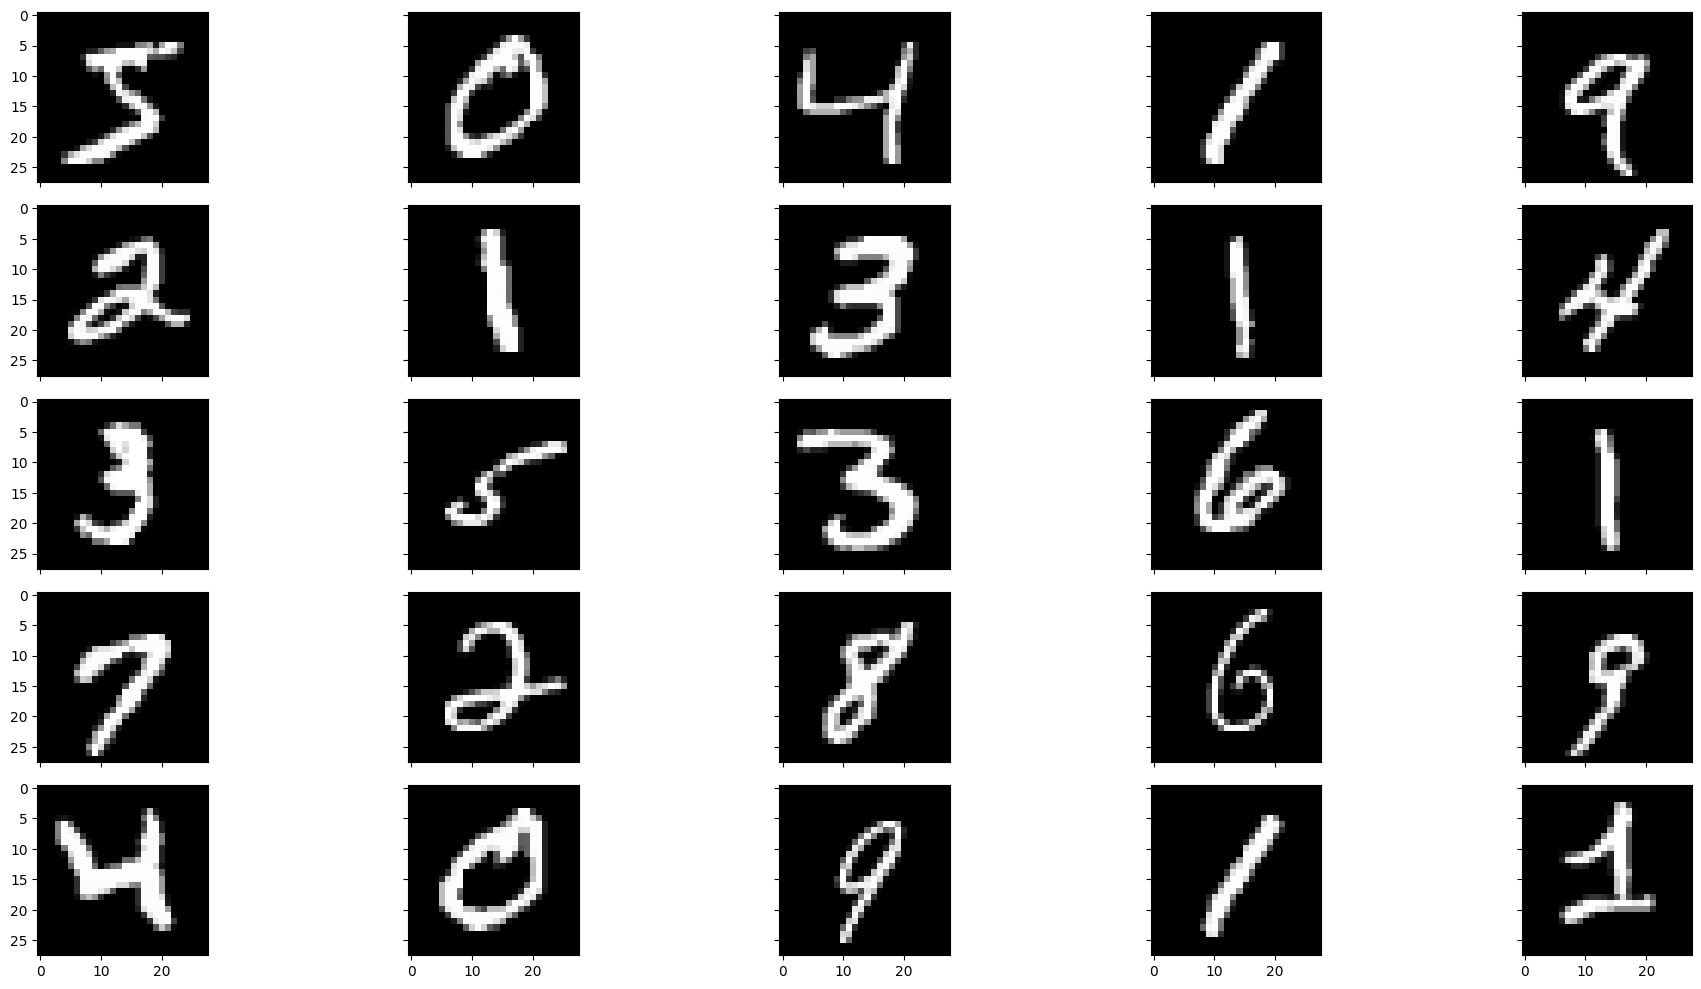

In [12]:
plot_samples(x_train, n=25, cmap="gray")

In [13]:
y_true = tf.constant([1, 2, 3], dtype=tf.int32)
y_1 = tf.constant([1, 0, 3], dtype=tf.int32)
y_pred = tf.one_hot(y_true, depth=10, dtype=tf.float32)
y_pred

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [14]:
keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.0728830e-06, 9.5367386e-07, 9.5367386e-07], dtype=float32)>

In [15]:
base_model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(10, activation="softmax"),
     ]
)

optimizer = keras.optimizers.Adam(learning_rate=0.02)
base_model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=optimizer,
    # optimizer="adam",
    metrics=["accuracy"],
)
base_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
base_model.fit(x_train, y_train, epochs=10)

Epoch 1/10


I0000 00:00:1743147385.205539      65 service.cc:152] XLA service 0x744700018bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743147385.205561      65 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-28 07:36:25.231754: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743147385.293260      65 cuda_dnn.cc:529] Loaded cuDNN version 90800


  99/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6999 - loss: 0.9044

I0000 00:00:1743147386.407770      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8632 - loss: 0.4961
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.8999 - loss: 0.4382
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9006 - loss: 0.4324
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.9021 - loss: 0.4468
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.9063 - loss: 0.4298
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.9014 - loss: 0.4530
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.9040 - loss: 0.4373
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9030 - loss: 0.4477
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.9040 - loss: 0.4412
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.9099 - loss: 0.4251


In [20]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(gpus))

Num GPUs Available:  1


In [21]:
base_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 844us/step - accuracy: 0.9082 - loss: 0.4252
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - accuracy: 0.9092 - loss: 0.4231
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.9069 - loss: 0.4415
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.9108 - loss: 0.4196
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 843us/step - accuracy: 0.9075 - loss: 0.4441
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step - accuracy: 0.9082 - loss: 0.4497
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.9080 - loss: 0.4475
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.9063 - loss: 0.4622
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 838us/step - accuracy: 0.9110 - loss: 0.4195
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.9083 - loss: 0.4358


In [22]:
test_loss, test_acc = base_model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8975 - loss: 0.6084
Test loss: 0.5507901310920715, Test accuracy: 0.9086999893188477


In [23]:
x_train[:4].shape

TensorShape([4, 28, 28])

In [24]:
y_pred = base_model.predict(x_train[1:4])
print(y_pred)
tf.argmax(y_pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
[[1.00000000e+00 1.45531335e-30 5.23049621e-16 9.41262571e-19
  3.73976354e-24 6.86280652e-16 1.19115323e-17 1.90875566e-27
  6.01690913e-17 8.15534240e-18]
 [8.82924976e-17 5.69217127e-06 9.62995088e-08 7.53449351e-02
  9.24645126e-01 8.69570388e-12 3.53881217e-15 3.63440063e-06
  9.92576421e-09 4.49287256e-07]
 [4.70557666e-16 9.99943495e-01 4.17765696e-05 1.55588839e-06
  1.60287126e-08 5.48494627e-09 1.60411512e-24 8.28122293e-13
  1.31674378e-05 1.60195870e-10]]


<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [25]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28), name="input_layer"),
                          keras.layers.Dense(20, activation="relu", name="hidden_layer"),
                          keras.layers.Dense(10, activation="softmax", name="output")])
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer (Dense)            │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8160 - loss: 0.6662
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.9324 - loss: 0.2399
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.9471 - loss: 0.1873
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9548 - loss: 0.1564
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9600 - loss: 0.1399
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9620 - loss: 0.1325
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9638 - loss: 0.1230
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.9667 - loss: 0.1132
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.9678 - loss: 0.1047
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - accuracy: 0.9696 - loss: 0.1014


In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9539 - loss: 0.1548
Test loss: 0.13979755342006683, Test accuracy: 0.9592000246047974


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer (Dense)            │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,732 (186.46 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,822 (124.31 KB)

In [30]:
predict(base_model, X_test[:3])


img=[tf.reshape(base_model.layers[1].weights[0][:,1], (28, 28)) for i in range(10)]

plot_samples(img, n=10, cmap="tab20")




NameError: name 'predict' is not defined

In [31]:
def predict (_model , _images , threshold =0.9) :
    _y_pred = model.predict(_images)
    classes = tf.argmax(_y_pred, axis=1)
    probs = tf.reduce_max(y_pred, axis=1)
    result=[classes[i].numpy() if _y_pred[i][classes[i]] > threshold else None for i in range(len(_y_pred))]
    return result

images = x_train[:4]
y_pred=model.predict(images)
y_pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


(4, 10)

In [32]:
tf.argmax(y_pred)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 3, 2, 0, 2, 0, 2, 3, 3, 2])>

In [33]:
images = x_train[1:10]
predict(model, images, threshold=0.99)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


[np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(4)]

In [35]:
cl=tf.argmax(y_pred, axis=1)
[y_pred[i][cl[i]] if y_pred[i][cl[i]] > 0.9 else 0 for i in range(len(cl))]

[np.float32(0.9834002),
 np.float32(0.9999652),
 np.float32(0.99667865),
 np.float32(0.9956724)]